###  Basic Exploratory Data Analysis

*By:* **Rabindra Nepal**

In [2]:
# dependencies

import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix

from scipy import stats
from scipy.stats import percentileofscore

import matplotlib.pyplot as plt
%matplotlib inline

# seaborn - plotting
import seaborn as sns

#from sci-kit learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# load data
# Data source: https://archive.ics.uci.edu/ml/datasets/online+news+popularity
df = pd.read_csv('OnlineNewsPopularity.csv')

In [4]:
all_data = df.copy()

In [4]:
# sneak peek into the data set
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [5]:
# some random sample from the data
df.sample(10)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
15112,http://mashable.com/2013/10/24/weird-twitter-a...,441.0,6.0,534.0,0.490234,1.0,0.636076,7.0,5.0,8.0,...,0.050000,1.000000,-0.389583,-1.000000,-0.050000,0.000000,0.000000,0.500000,0.000000,2700
12692,http://mashable.com/2013/09/09/burgers-search/,486.0,6.0,194.0,0.633508,1.0,0.760684,2.0,2.0,0.0,...,0.100000,0.227273,-0.400000,-0.400000,-0.400000,0.500000,0.136364,0.000000,0.136364,4100
17516,http://mashable.com/2013/12/13/nsa-cellphone-e...,391.0,10.0,486.0,0.514768,1.0,0.647260,5.0,4.0,1.0,...,0.050000,0.600000,-0.239583,-0.400000,-0.125000,0.454545,0.136364,0.045455,0.136364,1400
1335,http://mashable.com/2013/01/30/blackberry-10-f...,708.0,12.0,887.0,0.436860,1.0,0.619883,5.0,5.0,20.0,...,0.033333,1.000000,-0.201932,-0.666667,-0.071429,0.333333,0.250000,0.166667,0.250000,3000
340,http://mashable.com/2013/01/13/iphone-strings-...,725.0,16.0,83.0,0.843373,1.0,0.920000,5.0,3.0,1.0,...,0.100000,0.800000,-0.283333,-0.400000,-0.166667,0.000000,0.000000,0.500000,0.000000,2100
36606,http://mashable.com/2014/11/10/grover-kid-pres...,58.0,13.0,599.0,0.543478,1.0,0.763158,6.0,1.0,1.0,...,0.100000,1.000000,-0.259306,-0.500000,-0.050000,0.000000,0.000000,0.500000,0.000000,760
37760,http://mashable.com/2014/11/26/jian-ghomeshi-a...,41.0,13.0,580.0,0.533088,1.0,0.630607,29.0,2.0,1.0,...,0.100000,0.500000,-0.154971,-0.300000,-0.050000,0.266667,-0.083333,0.233333,0.083333,1400
17220,http://mashable.com/2013/12/09/facebook-year-i...,395.0,8.0,684.0,0.561457,1.0,0.708889,25.0,4.0,11.0,...,0.050000,0.700000,-0.388455,-1.000000,-0.100000,0.000000,0.000000,0.500000,0.000000,7700
14062,http://mashable.com/2013/10/04/must-reads-10-4...,461.0,10.0,1065.0,0.476420,1.0,0.597421,25.0,7.0,16.0,...,0.033333,0.800000,-0.190553,-0.700000,-0.050000,0.950000,0.600000,0.450000,0.600000,2000
22289,http://mashable.com/2014/03/24/android-piracy-...,290.0,11.0,509.0,0.534553,1.0,0.696667,9.0,2.0,1.0,...,0.100000,0.500000,-0.239141,-0.666667,-0.050000,0.000000,0.000000,0.500000,0.000000,955


In [6]:
# data information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
url                               39644 non-null object
 timedelta                        39644 non-null float64
 n_tokens_title                   39644 non-null float64
 n_tokens_content                 39644 non-null float64
 n_unique_tokens                  39644 non-null float64
 n_non_stop_words                 39644 non-null float64
 n_non_stop_unique_tokens         39644 non-null float64
 num_hrefs                        39644 non-null float64
 num_self_hrefs                   39644 non-null float64
 num_imgs                         39644 non-null float64
 num_videos                       39644 non-null float64
 average_token_length             39644 non-null float64
 num_keywords                     39644 non-null float64
 data_channel_is_lifestyle        39644 non-null float64
 data_channel_is_entertainment    39644 non-null float64
 data_channel_is_bus              396

In [7]:
# data dimensions
print('Data dimension')
print('Data shape: ', df.shape)

print('num of rows: ', df.shape[0])
print('num of columns: ', df.shape[1])

Data dimension
Data shape:  (39644, 61)
num of rows:  39644
num of columns:  61


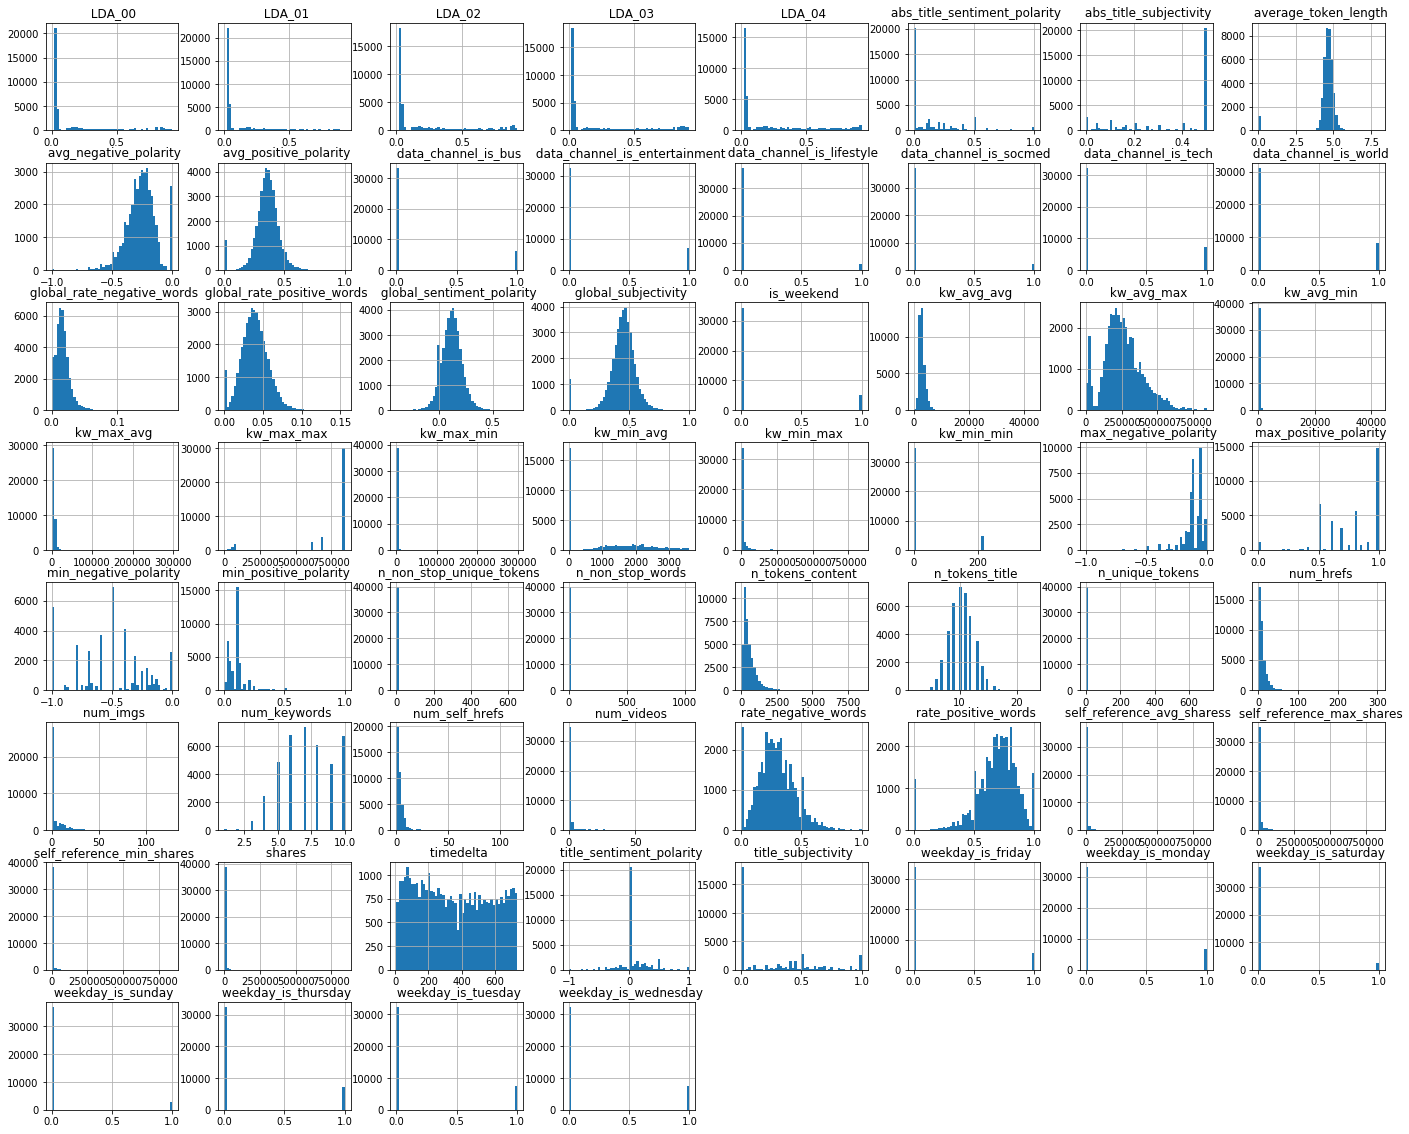

In [8]:
# Data Visualizations
# histograms of each numerical columns
df.hist(bins=50, figsize=(24,20));

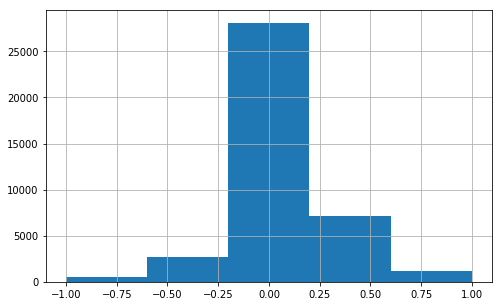

In [9]:
# single column histogram

df[' title_sentiment_polarity'].hist(bins=5, figsize=(8,5));

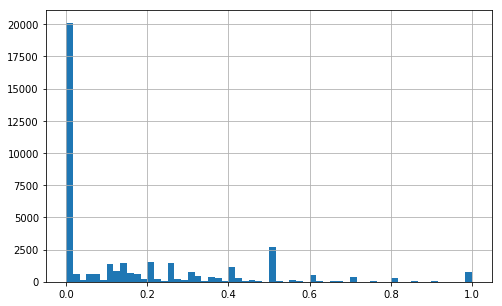

In [10]:
# important feature?
df[' abs_title_sentiment_polarity'].hist(bins=60, figsize=(8,5));

In [11]:
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


Now, I want to look into the data dyptes of all the columns

In [12]:
# numerical and categorical columns
# float or int
numerical_columns = dict()
categorical_columns = dict()

for column in df.columns.values:
    
    if df[column].dtype == 'object':
        categorical_columns[column] = df[column].dtype
    else:
        numerical_columns[column] = df[column].dtype

In [13]:
numerical_columns

{' timedelta': dtype('float64'),
 ' n_tokens_title': dtype('float64'),
 ' n_tokens_content': dtype('float64'),
 ' n_unique_tokens': dtype('float64'),
 ' n_non_stop_words': dtype('float64'),
 ' n_non_stop_unique_tokens': dtype('float64'),
 ' num_hrefs': dtype('float64'),
 ' num_self_hrefs': dtype('float64'),
 ' num_imgs': dtype('float64'),
 ' num_videos': dtype('float64'),
 ' average_token_length': dtype('float64'),
 ' num_keywords': dtype('float64'),
 ' data_channel_is_lifestyle': dtype('float64'),
 ' data_channel_is_entertainment': dtype('float64'),
 ' data_channel_is_bus': dtype('float64'),
 ' data_channel_is_socmed': dtype('float64'),
 ' data_channel_is_tech': dtype('float64'),
 ' data_channel_is_world': dtype('float64'),
 ' kw_min_min': dtype('float64'),
 ' kw_max_min': dtype('float64'),
 ' kw_avg_min': dtype('float64'),
 ' kw_min_max': dtype('float64'),
 ' kw_max_max': dtype('float64'),
 ' kw_avg_max': dtype('float64'),
 ' kw_min_avg': dtype('float64'),
 ' kw_max_avg': dtype('floa

In [14]:
categorical_columns

{'url': dtype('O')}

In [15]:
# Hmm... url is only the categorical feature here.

# how many categories?

print('Number of unique url: ', df['url'].nunique())

df['url'].nunique() == df.shape[0] # looks unique for each of the row

Number of unique url:  39644


True

In [16]:
# listing binary columns: i.e. column with value 1, 0 or true or false
binary_columns = dict()
for column in df.columns.values:
    if df[column].nunique() == 2:
        binary_columns[column] = df[column].unique().tolist()

In [17]:
binary_columns

{' data_channel_is_lifestyle': [0.0, 1.0],
 ' data_channel_is_entertainment': [1.0, 0.0],
 ' data_channel_is_bus': [0.0, 1.0],
 ' data_channel_is_socmed': [0.0, 1.0],
 ' data_channel_is_tech': [0.0, 1.0],
 ' data_channel_is_world': [0.0, 1.0],
 ' weekday_is_monday': [1.0, 0.0],
 ' weekday_is_tuesday': [0.0, 1.0],
 ' weekday_is_wednesday': [0.0, 1.0],
 ' weekday_is_thursday': [0.0, 1.0],
 ' weekday_is_friday': [0.0, 1.0],
 ' weekday_is_saturday': [0.0, 1.0],
 ' weekday_is_sunday': [0.0, 1.0],
 ' is_weekend': [0.0, 1.0]}

In [18]:
# Here I print the value_counts of only few columns 
# Most of the columns have many unique values so it will be a list of 
# many values, so I skipped.

for column in df.columns.values:
    # skip if column is in categorical column (which is only url) and 
    # binary columns (which will have only 0 0r 1)
    if column in categorical_columns.keys(): continue
    if column in binary_columns.keys(): continue
    
    # let us also skip the one with many unique values
    if df[column].nunique() > 30: continue
    print('column name: ', column)
    print(df[column].value_counts())

column name:   n_tokens_title
10.0    7358
11.0    6960
9.0     6278
12.0    5299
8.0     4227
13.0    3509
7.0     2120
14.0    1733
6.0      805
15.0     756
16.0     259
5.0      184
17.0      91
4.0       28
18.0      22
19.0       6
3.0        5
20.0       2
2.0        1
23.0       1
Name:  n_tokens_title, dtype: int64
column name:   num_keywords
7.0     7322
6.0     6801
10.0    6708
8.0     6094
5.0     4829
9.0     4732
4.0     2427
3.0      635
1.0       51
2.0       45
Name:  num_keywords, dtype: int64
column name:   kw_min_min
-1.0      22980
 4.0      11908
 217.0     4636
 0.0         79
 47.0         6
 57.0         5
 86.0         4
 82.0         3
 63.0         2
 45.0         2
 129.0        2
 294.0        2
 88.0         2
 98.0         1
 162.0        1
 65.0         1
 184.0        1
 80.0         1
 318.0        1
 138.0        1
 201.0        1
 97.0         1
 377.0        1
 42.0         1
 41.0         1
 116.0        1
Name:  kw_min_min, dtype: int64


In [19]:
df[' shares'].value_counts().sample(20)  # sample: to avoid printing long list of outputs

895        34
740        24
962        33
709        18
137         1
22800       7
361         4
35100       3
975        25
8000       42
14900      12
883        18
921        18
16700      13
1600     1137
797        26
631         8
11900      25
427         3
187         1
Name:  shares, dtype: int64

In [20]:
# I am goint to make ' shares' as the target feature

missing_value = 0
for i, value in enumerate(df[' shares'].isna().values):
    if value == True:
        print(i, value)
        missing_value += 1
print('number of missing value: ', missing_value)

number of missing value:  0


In [21]:
# Also counting the number of 0 in target column

zeros = 0
for value in df[' shares'].values:
    if value == 0.0:
        zeros += 1
print('Number of zeros in shares column: ', zeros)

Number of zeros in shares column:  0


In [22]:
# Here value 0 is not an invalid values in the target column
# But let us see if there are any invalid or NaN value, or missing values?

In [23]:
# Let us rename the shares column
# it contains a space infront of it, so let us remove it

df = df.rename(columns={' shares': 'shares'})
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [24]:
# Data cleaning

In [25]:
df['shares'].describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64

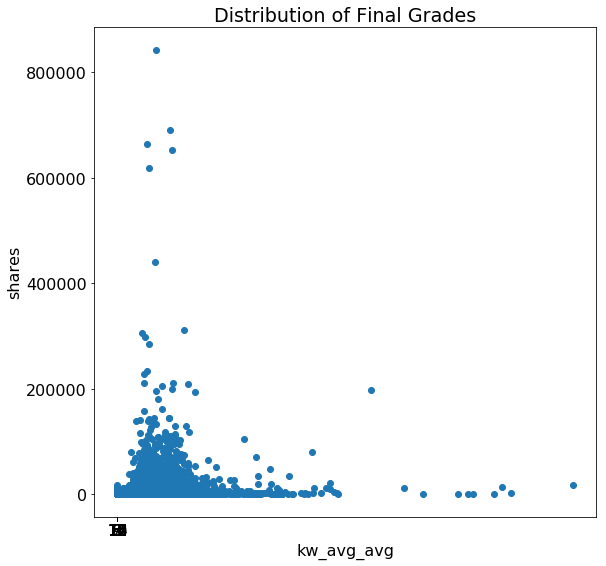

In [26]:
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = (9, 9)

# Bar plot of grades
plt.scatter(df[' kw_avg_avg'].values, df['shares'].values)
plt.xlabel('kw_avg_avg'); 
plt.ylabel('shares'); 
plt.title('Distribution of Final Grades');
plt.xticks(list(range(5, 20)));

In [27]:
df[' kw_avg_avg'].nunique()

39300

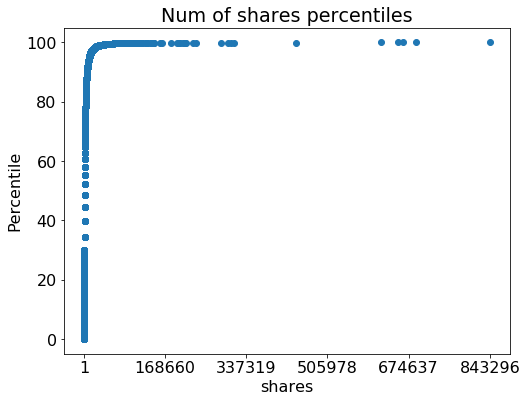

In [28]:
# Calculate percentile for shares
df['percentile'] = df['shares'].apply(lambda x: percentileofscore(df['shares'], x))

# Plot percentiles for shares
plt.figure(figsize = (8, 6))

plt.plot(df['shares'], df['percentile'], 'o')

# x-ticks
x_min = df['shares'].min()
x_max = df['shares'].max()
diff = int((x_max-x_min)/5)

plt.xticks(range(x_min, x_max, diff), range(x_min, x_max, diff))

plt.xlabel('shares'); 
plt.ylabel('Percentile'); 
plt.title('Num of shares percentiles');

In [29]:
# What does above graph tell?

# there are some of the news which are shared very large number of times comapred to the rest.

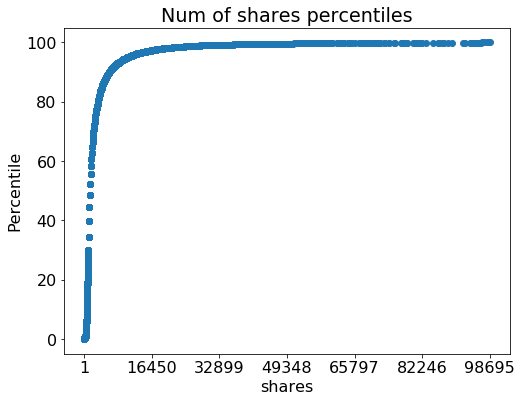

In [30]:
# let us assume shares > 100000 as outliers

# add an extra column
df['outlier_shares'] = df['shares'].apply(lambda x: True if x > 100000 else False)

temp = df.copy()
temp = temp[temp.outlier_shares == False]
temp['percentile'] = temp['shares'].apply(lambda x: percentileofscore(temp['shares'], x))

plt.figure(figsize = (8, 6))
plt.plot(temp['shares'], temp['percentile'], 'o')

# x-ticks
x_min = temp['shares'].min()
x_max = temp['shares'].max()
diff = int((x_max-x_min)/6)

plt.xticks(range(x_min, x_max, diff), range(x_min, x_max, diff))
plt.xlabel('shares'); 
plt.ylabel('Percentile'); 
plt.title('Num of shares percentiles');

In [31]:
# CORRELATION

df.corr()['shares'].abs().sort_values(ascending=False)[:25]

shares                           1.000000
outlier_shares                   0.662020
percentile                       0.309093
 kw_avg_avg                      0.110413
 LDA_03                          0.083771
 kw_max_avg                      0.064306
 LDA_02                          0.059163
 self_reference_avg_sharess      0.057789
 self_reference_min_shares       0.055958
 data_channel_is_world           0.049497
 self_reference_max_shares       0.047115
 num_hrefs                       0.045404
 kw_avg_max                      0.044686
 kw_min_avg                      0.039551
 num_imgs                        0.039388
 avg_negative_polarity           0.032029
 global_subjectivity             0.031604
 kw_avg_min                      0.030406
 kw_max_min                      0.030114
 abs_title_sentiment_polarity    0.027135
 num_videos                      0.023936
 average_token_length            0.022007
 title_subjectivity              0.021967
 num_keywords                    0

In [32]:
# Let us look into only some important variables
# I have taken features with both POSITIVE and NEGATIVE high correlation with shares
# with abs()
# working further with top 25 features

In [33]:
features = df.corr()['shares'].abs().sort_values(ascending=False)[:10]
features = list(dict(features).keys())
# list of top 10 attributes
# avoiding derived features
attributes = []
for feature in features:
    if feature != 'percentile' and feature != 'outlier_shares':
        attributes.append(feature)
attributes

['shares',
 ' kw_avg_avg',
 ' LDA_03',
 ' kw_max_avg',
 ' LDA_02',
 ' self_reference_avg_sharess',
 ' self_reference_min_shares',
 ' data_channel_is_world']

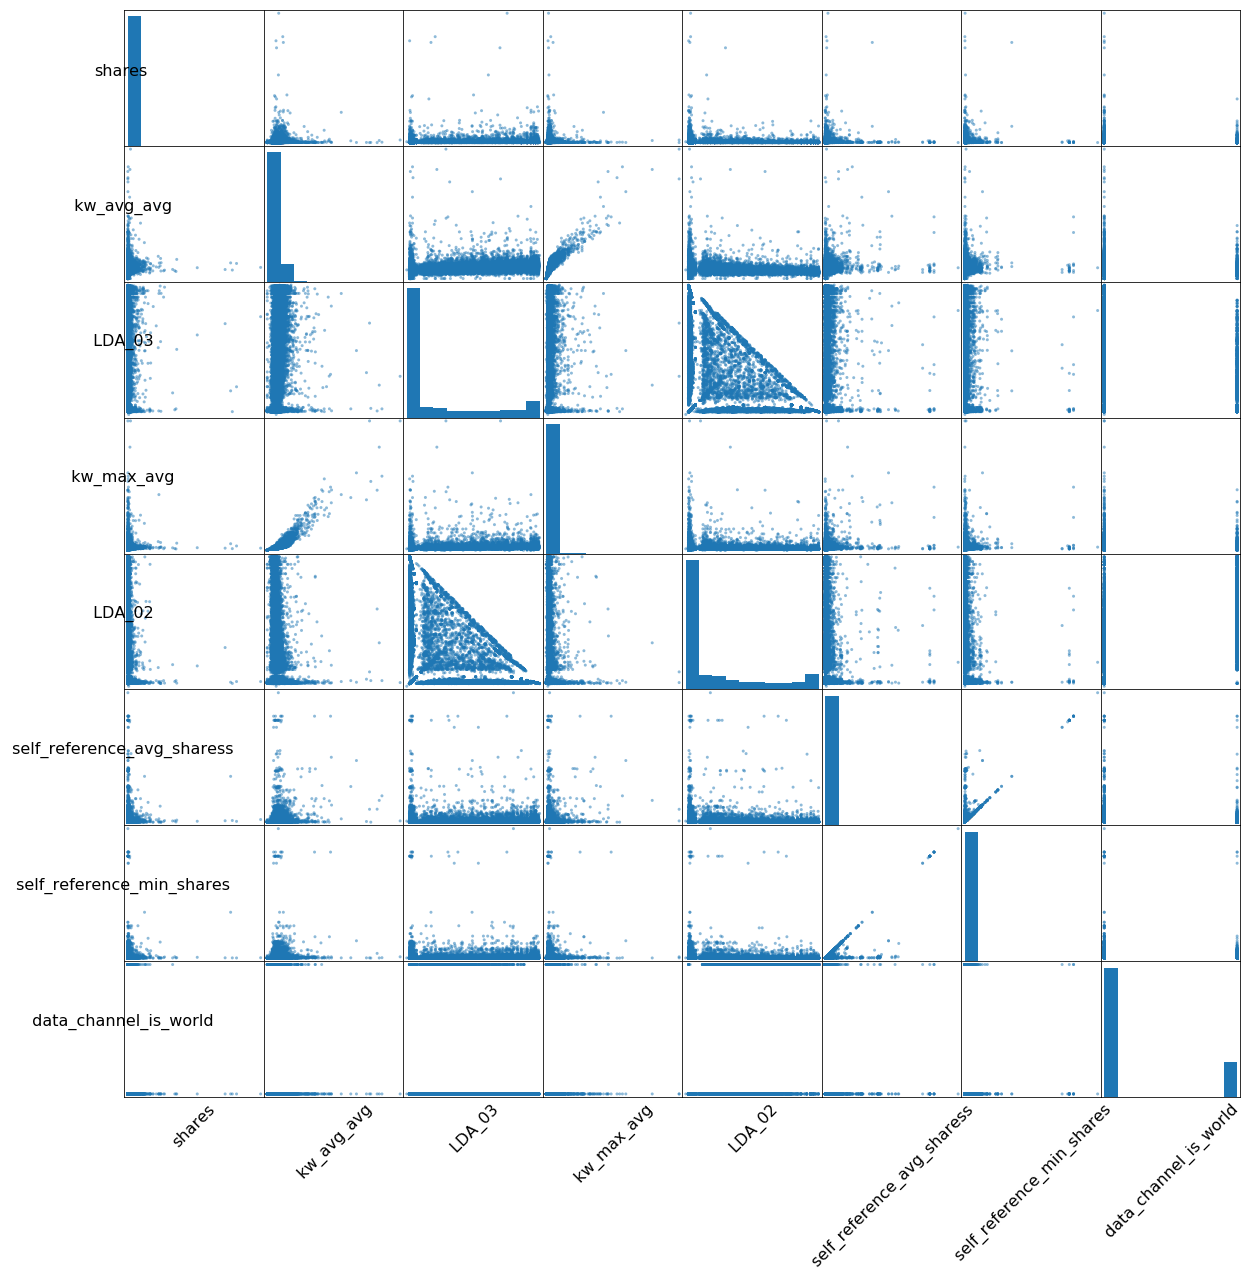

In [34]:
# scatter_matrix plot
sm = scatter_matrix(df[attributes], figsize=(20, 20));

#Change label rotation
[s.xaxis.label.set_rotation(45) for s in sm.reshape(-1)];
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)];

#Hide all ticks
[s.set_xticks(()) for s in sm.reshape(-1)];
[s.set_yticks(()) for s in sm.reshape(-1)];

In [35]:
# Correlation between two attributes

Text(0.5, 1.0, 'Scatter Plot')

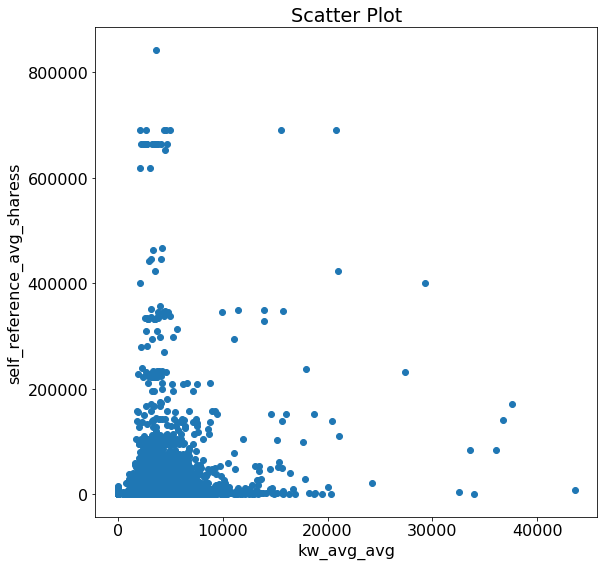

In [36]:
plt.plot(df[' kw_avg_avg'], df[' self_reference_avg_sharess'], 'o');
plt.xlabel('kw_avg_avg')
plt.ylabel('self_reference_avg_sharess')
plt.title('Scatter Plot')

In [37]:
# Here the only categorical feature/attribute is 'url'
# since it seems unique for each data point, I am going to 

# treat url as an IDENTIFIER

# so we will not encode this into numerical feature

In [38]:
# SO No one_hot_ecoding in this case

In [39]:
features

['shares',
 'outlier_shares',
 'percentile',
 ' kw_avg_avg',
 ' LDA_03',
 ' kw_max_avg',
 ' LDA_02',
 ' self_reference_avg_sharess',
 ' self_reference_min_shares',
 ' data_channel_is_world']

In [40]:
# Attributes to consider further

In [41]:
attributes = df.corr()['shares'].abs().sort_values(ascending=False)[:25]
attributes = attributes.index.tolist()
attributes.remove('outlier_shares')
attributes.remove('percentile')
attributes

['shares',
 ' kw_avg_avg',
 ' LDA_03',
 ' kw_max_avg',
 ' LDA_02',
 ' self_reference_avg_sharess',
 ' self_reference_min_shares',
 ' data_channel_is_world',
 ' self_reference_max_shares',
 ' num_hrefs',
 ' kw_avg_max',
 ' kw_min_avg',
 ' num_imgs',
 ' avg_negative_polarity',
 ' global_subjectivity',
 ' kw_avg_min',
 ' kw_max_min',
 ' abs_title_sentiment_polarity',
 ' num_videos',
 ' average_token_length',
 ' title_subjectivity',
 ' num_keywords',
 ' max_negative_polarity']

In [42]:
# removing rest of the attributes now
df = df[attributes]

In [43]:
# Redundant attributes?

In [44]:
attributes = ['shares', ' kw_avg_avg', ' LDA_03', ' kw_max_avg', ' LDA_02', ' self_reference_avg_sharess', 
              ' self_reference_min_shares', 
 ' data_channel_is_world', ' self_reference_max_shares', ' num_hrefs', ' kw_avg_max', ' kw_min_avg', ' num_imgs',
 ' avg_negative_polarity', ' global_subjectivity', ' kw_avg_min', ' kw_max_min', ' abs_title_sentiment_polarity',
 ' num_videos', ' average_token_length', ' title_subjectivity', ' num_keywords', ' max_negative_polarity']

In [45]:
# DROPPING some redunant(or only one is nearly sufficient) attributes
df = df.drop(columns=[' kw_max_avg' , ' kw_avg_max', ' kw_min_avg', ' kw_avg_min', ' kw_max_min',
                      ' self_reference_min_shares', ' self_reference_max_shares'])

In [46]:
df.head()

,shares,kw_avg_avg,LDA_03,LDA_02,self_reference_avg_sharess,data_channel_is_world,num_hrefs,num_imgs,avg_negative_polarity,global_subjectivity,abs_title_sentiment_polarity,num_videos,average_token_length,title_subjectivity,num_keywords,max_negative_polarity
0,593,0.0,0.041263,0.040005,496.000000,0.0,4.0,1.0,-0.350000,0.521617,0.187500,0.0,4.680365,0.500000,5.0,-0.200000
1,711,0.0,0.050101,0.050096,0.000000,0.0,3.0,1.0,-0.118750,0.341246,0.000000,0.0,4.913725,0.000000,4.0,-0.100000
2,1500,0.0,0.033334,0.033351,918.000000,0.0,3.0,1.0,-0.466667,0.702222,0.000000,0.0,4.393365,0.000000,6.0,-0.133333
3,1200,0.0,0.028905,0.494651,0.000000,0.0,9.0,1.0,-0.369697,0.429850,0.000000,0.0,4.404896,0.000000,7.0,-0.166667
4,505,0.0,0.028572,0.028575,3151.157895,0.0,19.0,20.0,-0.220192,0.513502,0.136364,0.0,4.682836,0.454545,7.0,-0.050000


In [47]:
df.columns

Index(['shares', ' kw_avg_avg', ' LDA_03', ' LDA_02',
       ' self_reference_avg_sharess', ' data_channel_is_world', ' num_hrefs',
       ' num_imgs', ' avg_negative_polarity', ' global_subjectivity',
       ' abs_title_sentiment_polarity', ' num_videos', ' average_token_length',
       ' title_subjectivity', ' num_keywords', ' max_negative_polarity'],
      dtype='object')

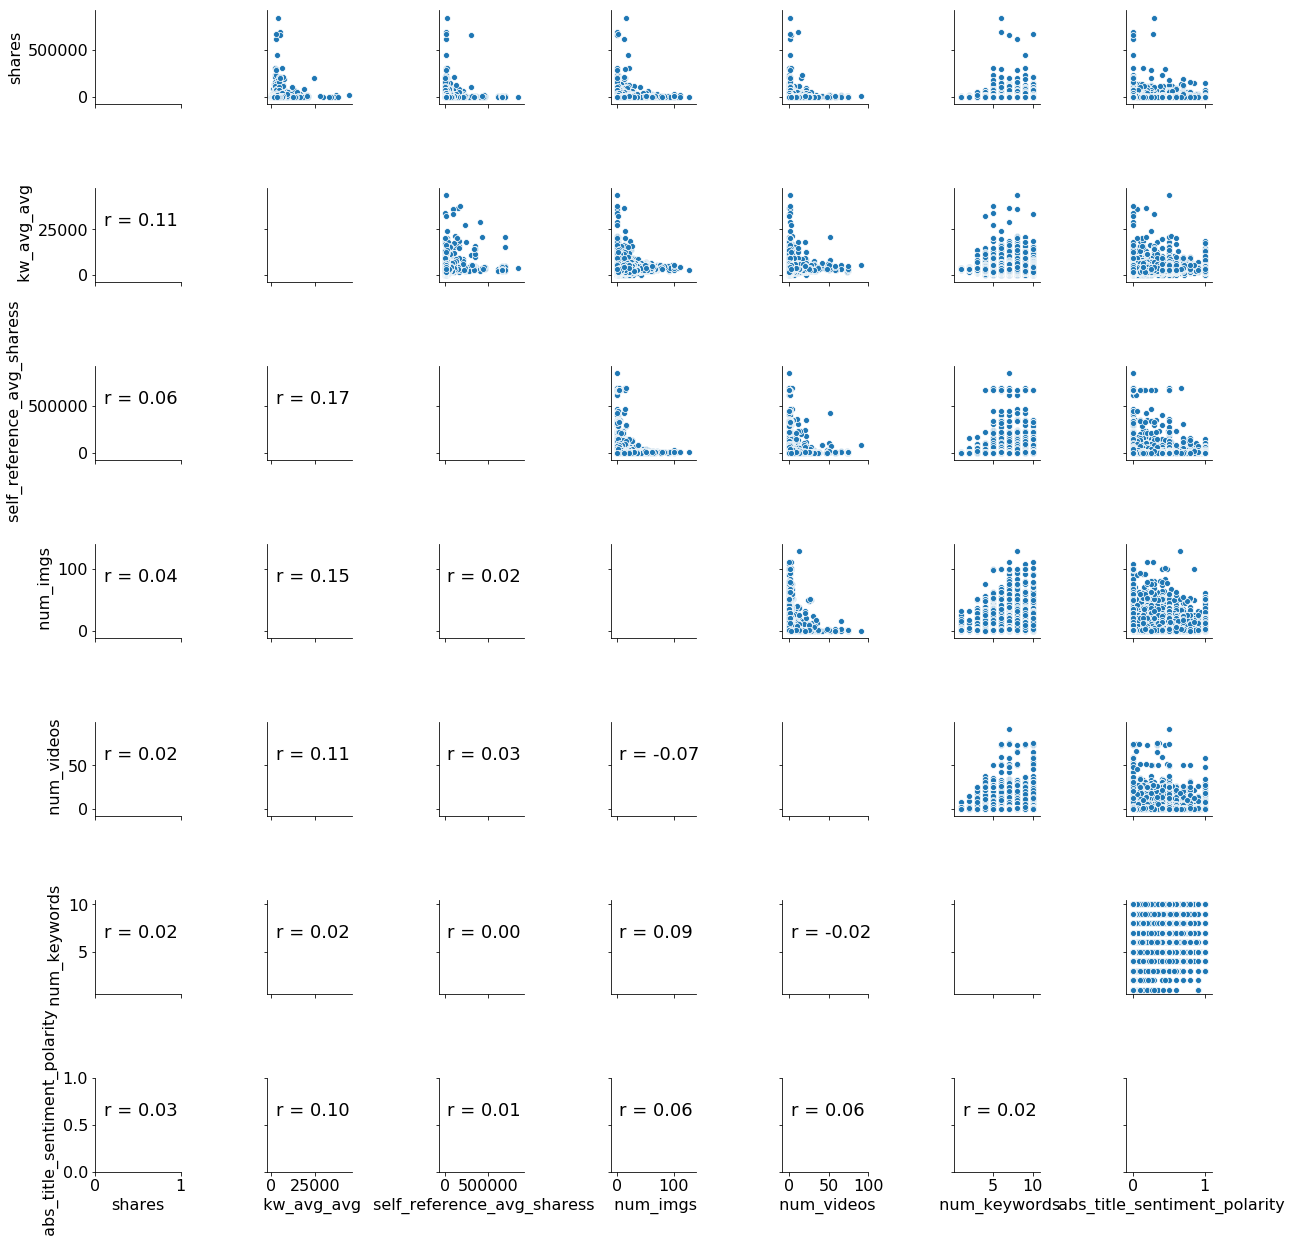

In [48]:
# Calculate correlation coefficient
# and PairPlot with seaborn
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r), xy=(.1, .6), xycoords=ax.transAxes, size = 18)
    
cmap = sns.cubehelix_palette(light=1, dark = 0.1, hue = 0.5, as_cmap=True)

sns.set_context(font_scale=2)

# Pair grid set up
g = sns.PairGrid(df[['shares', ' kw_avg_avg', ' self_reference_avg_sharess', ' num_imgs', ' num_videos', ' num_keywords',
                     ' abs_title_sentiment_polarity']])
g.map_lower(corrfunc);
g.map_upper(sns.scatterplot);
#g.map_lower(sns.kdeplot); #taking very long time 

## Linear Regression 

using sci-kit learn

In [49]:
y = df['shares']
X = df.drop(columns='shares')
df.head()

,shares,kw_avg_avg,LDA_03,LDA_02,self_reference_avg_sharess,data_channel_is_world,num_hrefs,num_imgs,avg_negative_polarity,global_subjectivity,abs_title_sentiment_polarity,num_videos,average_token_length,title_subjectivity,num_keywords,max_negative_polarity
0,593,0.0,0.041263,0.040005,496.000000,0.0,4.0,1.0,-0.350000,0.521617,0.187500,0.0,4.680365,0.500000,5.0,-0.200000
1,711,0.0,0.050101,0.050096,0.000000,0.0,3.0,1.0,-0.118750,0.341246,0.000000,0.0,4.913725,0.000000,4.0,-0.100000
2,1500,0.0,0.033334,0.033351,918.000000,0.0,3.0,1.0,-0.466667,0.702222,0.000000,0.0,4.393365,0.000000,6.0,-0.133333
3,1200,0.0,0.028905,0.494651,0.000000,0.0,9.0,1.0,-0.369697,0.429850,0.000000,0.0,4.404896,0.000000,7.0,-0.166667
4,505,0.0,0.028572,0.028575,3151.157895,0.0,19.0,20.0,-0.220192,0.513502,0.136364,0.0,4.682836,0.454545,7.0,-0.050000


In [50]:
# Split into training/testing sets with 20% split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=2019)

In [51]:
# Calculate mae and rmse
def evaluate_predictions(predictions, true):
    mae = np.mean(abs(predictions - true))
    rmse = np.sqrt(np.mean((predictions - true) ** 2))
    
    return mae, rmse

In [52]:
# median as Baseline

median_pred = y_train.median()

print(median_pred)

median_preds = [median_pred for _ in range(len(y_test))]
true = y_test

# Display the naive baseline metrics
mb_mae, mb_rmse = evaluate_predictions(median_preds, true)
print('Median Baseline  MAE: {:.4f}'.format(mb_mae))
print('Median Baseline RMSE: {:.4f}'.format(mb_rmse))

1400.0
Median Baseline  MAE: 2400.0100
Median Baseline RMSE: 12363.5917


In [53]:
# Create linear regression object
model = LinearRegression()

# Train the model using the traing data and label
model.fit(X_train, y_train)

# The intercept
b = model.intercept_
print('Intercept: \n',b )

# The feature weights (coefficients) in an array
m = model.coef_
print('Coefficients: \n', m)


# Make predictions using the test data
y_predicted = model.predict(X_test)


# RMSE of the model
print("\nMean squared error: %.2f"
      % mean_squared_error(y_test, y_predicted))


# Explained variance score: 1 is perfect prediction
print('\nCoefficient of determination r^2 variance score [1 is perfect prediction]: %.2f' % r2_score(y_test, y_predicted))

Intercept: 
 657.3936424483113
Coefficients: 
 [ 7.12531854e-01  1.15011473e+03 -1.04708836e+03  2.34328274e-02
  3.26470570e+02  2.56083892e+01  1.41705927e+01 -7.84295524e+02
  2.74166266e+03  7.62812360e+02 -2.25704322e+00 -4.60547677e+02
 -2.89133732e+02  6.16641116e+01 -1.10583659e+03]

Mean squared error: 147923297.54

Coefficient of determination r^2 variance score [1 is perfect prediction]: 0.01


In [54]:
# Model Metrics
mae = np.mean(abs(y_predicted - y_test))
rmse = np.sqrt(np.mean((y_predicted - y_test) ** 2))

print("Linear Regression MAE: ", mae)
print("Linear Regression RMSE: ", rmse)


# Baseline Metrics
baseline = np.median(y_train)
baseline_mae = np.mean(abs(baseline - y_test))
baseline_rmse = np.sqrt(np.mean((baseline - y_test) ** 2))


print("\nBaseline MAE: ", baseline_mae)
print("Baseline RMSE: ", baseline_rmse)

Linear Regression MAE:  3049.592006411684
Linear Regression RMSE:  12162.372200420965

Baseline MAE:  2400.0099634254007
Baseline RMSE:  12363.591733871735


In [56]:
# Terrible model, doesnot make sense at all

In [57]:
# Let us retry using all the given attributes

In [59]:
all_data.shape

(39644, 61)

In [60]:
y = all_data[' shares']

In [62]:
X = all_data.drop(columns=['url', ' shares'])

In [65]:
# median as Baseline

median_pred = y_train.median()

print(median_pred)

median_preds = [median_pred for _ in range(len(y_test))]
true = y_test

# Display the naive baseline metrics
mb_mae, mb_rmse = evaluate_predictions(median_preds, true)
print('Median Baseline  MAE: {:.4f}'.format(mb_mae))
print('Median Baseline RMSE: {:.4f}'.format(mb_rmse))

1400.0
Median Baseline  MAE: 2400.0100
Median Baseline RMSE: 12363.5917


In [66]:
# Create linear regression object
model = LinearRegression()

# Train the model using the traing data and label
model.fit(X_train, y_train)

# The intercept
b = model.intercept_
print('Intercept: \n',b )

# The feature weights (coefficients) in an array
m = model.coef_
print('Coefficients: \n', m)


# Make predictions using the test data
y_predicted = model.predict(X_test)


# RMSE of the model
print("\nMean squared error: %.2f"
      % mean_squared_error(y_test, y_predicted))


# Explained variance score: 1 is perfect prediction
print('\nCoefficient of determination r^2 variance score [1 is perfect prediction]: %.2f' % r2_score(y_test, y_predicted))

Intercept: 
 657.3936424483113
Coefficients: 
 [ 7.12531854e-01  1.15011473e+03 -1.04708836e+03  2.34328274e-02
  3.26470570e+02  2.56083892e+01  1.41705927e+01 -7.84295524e+02
  2.74166266e+03  7.62812360e+02 -2.25704322e+00 -4.60547677e+02
 -2.89133732e+02  6.16641116e+01 -1.10583659e+03]

Mean squared error: 147923297.54

Coefficient of determination r^2 variance score [1 is perfect prediction]: 0.01


In [67]:
# Model Metrics
mae = np.mean(abs(y_predicted - y_test))
rmse = np.sqrt(np.mean((y_predicted - y_test) ** 2))

print("Linear Regression MAE: ", mae)
print("Linear Regression RMSE: ", rmse)


# Baseline Metrics
baseline = np.median(y_train)
baseline_mae = np.mean(abs(baseline - y_test))
baseline_rmse = np.sqrt(np.mean((baseline - y_test) ** 2))


print("\nBaseline MAE: ", baseline_mae)
print("Baseline RMSE: ", baseline_rmse)

Linear Regression MAE:  3049.592006411684
Linear Regression RMSE:  12162.372200420965

Baseline MAE:  2400.0099634254007
Baseline RMSE:  12363.591733871735


In [3]:
# It is just for the illustration purposes, not for any meaningful analysis

In [4]:
# model is even worse than the baseline?
# looks the attributes are not understood well for a linear regression model

In [70]:
# Rather classification model will do better if we create classes of n_shares and predict the shares classes
# haven't tried though!